### Project: Test a Perceptual Phenomenon
#### By: Seema Mishra

### [Background Information](https://faculty.washington.edu/chudler/java/ready.html)
In a Stroop task, participants are presented with a list of words, with each word displayed in a color of ink. The participant’s task is to say out loud the color of the ink in which the word is printed. The task has two conditions: a congruent words condition, and an incongruent words condition. In the congruent words condition, the words being displayed are color words whose names match the colors in which they are printed: for example RED, BLUE. In the incongruent words condition, the words displayed are color words whose names do not match the colors in which they are printed: for example PURPLE, ORANGE. In each case, we measure the time it takes to name the ink colors in equally-sized lists. Each participant will go through and record a time from each condition.

In [52]:
#Place dataset in current working directory

import pandas
df = pandas.read_csv(path + '/stroopdata.csv')
df['Subject'] = df.index+1
df

,Congruent,Incongruent,Subject
0,12.079,19.278,1
1,16.791,18.741,2
2,9.564,21.214,3
3,8.630,15.687,4
4,14.669,22.803,5
5,12.238,20.878,6
6,14.692,24.572,7
7,8.987,17.394,8
8,9.401,20.762,9
9,14.480,26.282,10


### 1. What is our independent variable? What is our dependent variable? 
 -Independent variable - Word Condition (Congruent or Incongruent)  
 -Dependent variable - Response Time(the time it takes to name the ink colors) in seconds.           

### 2. What is an appropriate set of hypotheses for this task? What kind of statistical test do you expect to perform? Justify your choices.

**Ho - Null Hypothesis:** ( μi - μc = 0 ) There is no significant difference in the population average response time in viewing the congruent(c) words vs viewing the incongruent(i) words.

**Ha - Alternative Hypothesis:** ( μi - μc ≠ 0 ) There is a significant difference, positive or negative, in the population average response times.

The Dependent Samples parametric student t-Test is the appropriate statistical test as the same subjects are assigned two different conditions which are dependent samples.    
The different conditions are dependent because, in theory, by doing the first test you have some practice doing it and you might have an unfair advantage due to this learning effect in doing the similar type of test second. In addition, we don't have any population parameters provided (so a z-test would not be appropriate here).


### 3. Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability.

In [4]:
C = df['Congruent']; I = df['Incongruent']


In [9]:
C_mean = C.mean(); round(C_mean,2)
C_sd = C.std(); round(C_sd,2)
print "The mean of congruent sample is", C_mean
print "The standard deviation of congruent sample is", C_sd

The mean of congruent sample is 14.051125
The standard deviation of congruent sample is 3.55935795765


In [8]:
I_mean = I.mean(); round(I_mean,2)
I_sd = I.std(); round(I_sd,2)
print "The mean of icongruent sample is", I_mean
print "The standard deviation of icongruent sample is", I_sd

The mean of icongruent sample is 22.0159166667
The standard deviation of icongruent sample is 4.79705712247


### 4. Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

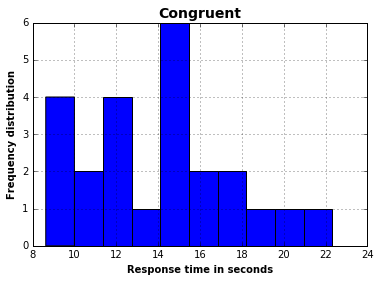

In [43]:
import matplotlib.pyplot as plt
%matplotlib inline

df.hist(column='Congruent')
plt.title('Congruent', fontsize=14, fontweight='bold')
plt.xlabel('Response time in seconds',  fontweight='bold')
plt.ylabel('Frequency distribution',  fontweight='bold')



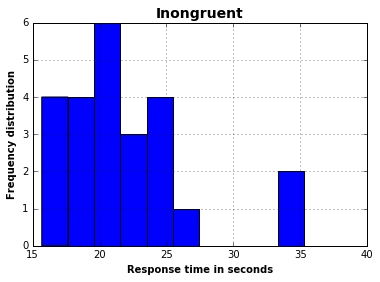

In [44]:
df.hist(column='Incongruent')
plt.title('Inongruent',fontsize=14, fontweight='bold')
plt.xlabel('Response time in seconds', fontweight='bold')
plt.ylabel('Frequency distribution', fontweight='bold')


The congruent words sample has a distribution which is between 8 and 22 seconds and has a lower average completion time compared to the incongruent words sample distribution which shows the distibtuion is between 15 to about 26 seconds and one point  which appears to be one outlier at 35 seconds. The average completion time is definitely higher.

### 5. Now, perform the statistical test and report your results. What is your confidence level and your critical statistic value? Do you reject the null hypothesis or fail to reject it? Come to a conclusion in terms of the experiment task. Did the results match up with your expectations?  

Confidence Level = 90% 
t-critical value (2-sided test) -> from [t-table](https://s3.amazonaws.com/udacity-hosted-downloads/t-table.jpg) t-table 
degree of freedom(df) = n - 1 = 23 
t-critical = +- 1.711 

In [47]:
#number of subjects in the sample
n = len(df)
n

24

In [49]:
#point estimate of μi - μc -> PE (in seconds)
PE = I_mean - C_mean
round(PE,2)


7.96

In [50]:
#s - sample standard deviation of differences
#1. D = sample difference
df['D'] = df['Incongruent'] - df['Congruent']

#2. DFM = difference from the mean
#SQD = squared differences from the mean
DFM = df['D'] - df['D'].mean()
df['SQD'] = DFM*DFM

#3. SSD = sum of squared differences
SSD = df['SQD'].sum()

#4. v = variance = SSD/(n-1)
v = SSD/(n-1)

#5. s = sqrt(v)
from math import *
s = sqrt(v)
round(s,2)

4.86

In [51]:
#t-statistic
#t = PE/(s/√n)
#PE = (μi - μc)
t = PE/(s/(sqrt(n)))
round(t,4)

8.0207

t-statistic > t-critical  
8.0207 > 1.711

**Conclusion**  
We reject the Null Hypothesis which states that there is no significant differences between the population average completion time for the two different conditions (Congruent & Incongruent). These are the results I expected since my own personal experience showed that the incongruent word condition took me longer time as compaired to congruent word condition.

### Refrences

1. [Strrop Test](https://en.wikipedia.org/wiki/Stroop_effect)
2. [Stat Trek: Student's t Distribution](http://stattrek.com/probability-distributions/t-distribution.aspx)